In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx

In [8]:
def mandelbrot(x, y, threshold):
    """Calculates whether the number c = x + i*y belongs to the 
    Mandelbrot set. In order to belong, the sequence z[i + 1] = z[i]**2 + c
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[i+1] is greater than 4.
    
    :param float x: the x component of the initial complex number
    :param float y: the y component of the initial complex number
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    c = complex(x, y)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge


<ipython-input-9-b2f6331e01b6>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])  # clear x-axis ticks
<ipython-input-9-b2f6331e01b6>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])  # clear y-axis ticks


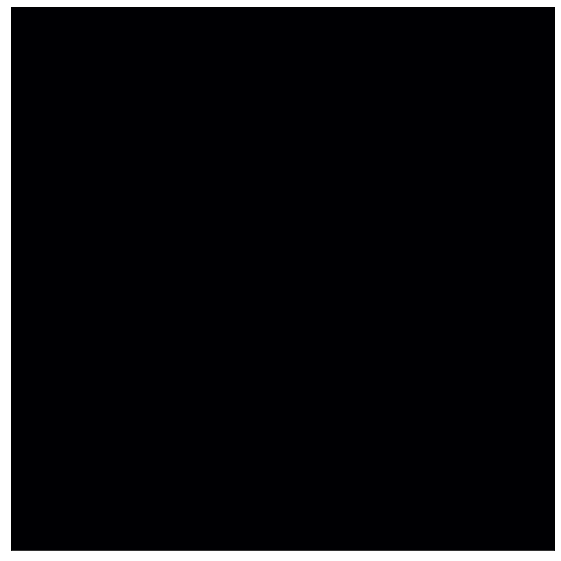

In [9]:
x_start, y_start = -2, -1.5  # an interesting region starts here
width, height = 3, 3  # for 3 units up and right
density_per_unit = 250  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object

def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks
    
    X = np.empty((len(re), len(im)))  # re-initialize the array-like image
    threshold = round(1.15**(i + 1))  # calculate the current threshold
    
    # iterations for the current threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)
    
    # associate colors to the iterations with an iterpolation
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]
 
anim = animation.FuncAnimation(fig, animate, frames=45, interval=120, blit=True)
# anim.save('mandelbrot.gif')

plt.show()